# Fourier Decomposition in Python Using SciPy

From <a href ="https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html">here</a>.

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

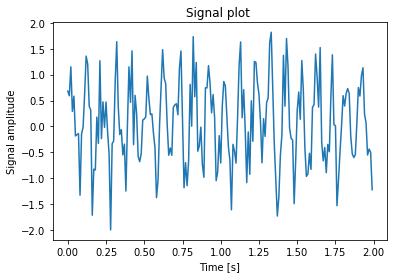

In [26]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
signal_vals = np.sin(f * 2 * np.pi * t) + np.random.normal(0,0.5, (2 * f_s))

fig, ax = plt.subplots()
ax.plot(t, signal_vals )
plt.title("Signal plot ")
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

/home/greg/Desktop/virtual_environments/standard_env/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


(-5, 110)

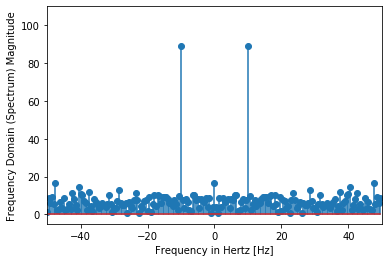

In [27]:
from scipy import fftpack

f_s = 100 # Sampling rate

# signal_values = # set signal vals

signal_vals_fft = fftpack.fft(signal_vals)
freqs = fftpack.fftfreq(len(signal_vals)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(signal_vals_fft))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)

In [35]:
power = np.abs(signal_vals_fft)


sorted_power = np.argsort(power)[::-1][::2]


[88.78807579 16.52518531 16.33548204 14.4910066  12.99443702 12.03106523
 11.27490418 11.11625869 10.58020862 10.44209395 10.24920179 10.22459233
 10.1568014  10.082504    9.97060357  9.71514317  9.70353938  9.41579583
  9.36635229  9.06892703  9.06812762  8.96686598  8.84637608  8.72697657
  8.65343899  8.5337337   8.37074973  8.09751208  8.05528349  8.0328612
  7.98091066  7.93842253  7.6438797   7.61963629  7.60422864  7.56087326
  7.38995046  7.35919681  7.31170319  6.96701508  6.9646202   6.79482499
  6.61658617  6.58228423  6.4472285   6.38474081  6.33172397  6.30999999
  6.18908292  6.18249799  6.17535409  6.11478905  6.10288855  6.00652213
  5.85694995  5.71996697  5.56288155  5.55312958  5.42852884  5.36670673
  5.34255767  5.34159091  5.08467739  4.84594079  4.79763976  4.74675948
  4.6022679   4.43772437  4.41748667  4.35736068  4.28090999  4.21340375
  3.9999989   3.86534773  3.76209338  3.60633391  3.49006653  3.4858699
  3.4370716   3.34525754  3.26114734  3.18752566  3.1

In [45]:
first_n = 4

included_terms = sorted_power[0:first_n]
print(power[included_terms])
included_frequencies = freqs[included_terms]

print(included_frequencies)

[88.78807579 16.52518531 16.33548204 14.4910066 ]
[10.   0.  47.5 40.5]


### TO DO:

 * edit get_fourier_coefs to take in the entire frequency array and choose only the three most important

In [134]:
global freqs

def get_fourier_coefs(t, signal_vals, freqs, order = 2, inits = None):
    
    """
    Calculates the coefficients of the Fourier series describing the input data.
    
    
    Inputs
    ------
    
    
    Returns
    -------
    params (numpy.ndarray): Array of Fourier coefficients.
    params_covariance (numpy.ndarray): Covariance of Fourier coefficients.
    """
    
    if inits == None:
        inits = np.random.normal(0,2, 2*order - 1)
        
    if 0.0 not in freqs:
        
        freqs = [0.0] + list(freqs)
        
    var_string = ""

    for i in range(order):
        if i==0:
            var_string += "a_{} ".format(i)
        else:
            var_string += ", a_{}, b_{} ".format(i, i)
        
    for i in range(order):
    
        if i == 0:
            fourier_string = "a_{} * np.cos(2 * np.pi * {} * t)".format(i, freqs[i])
        else:
            fourier_string += " + a_{} * np.cos(2 * np.pi * {} * t) + b_{} * np.sin(2 * np.pi * {} * t)".format(i, freqs[i], i, freqs[i])
        
    exec("""def fourier_function(t, {}):
                fourier_output = {}
                return fourier_output""".format(var_string, fourier_string))

    params, params_covariance = optimize.curve_fit(fourier_function, t, signal_vals,
                                               p0=inits)
    
    return params, params_covariance

In [133]:
get_fourier_coefs(t, signal_vals, included_frequencies, 3, inits = None)

(array([ 0.08262593, -0.03789028, -0.00764322, -0.00541211, -0.00601672]),
 array([[ 3.23557615e-03,  2.30633391e-11,  5.51954540e-11,
          1.97657467e-10,  2.35391138e-10],
        [ 2.30633391e-11,  6.47115232e-03,  2.92537105e-10,
          5.54174846e-11,  2.57687220e-10],
        [ 5.51954540e-11,  2.92537105e-10,  6.47115238e-03,
         -4.47430980e-10,  5.74813719e-10],
        [ 1.97657467e-10,  5.54174846e-11, -4.47430980e-10,
          6.47115236e-03,  5.80185553e-10],
        [ 2.35391138e-10,  2.57687220e-10,  5.74813719e-10,
          5.80185553e-10,  6.47115386e-03]]))